## Lets Start

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('seaborn-whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!git clone https://github.com/BigcontestParrot2020/csv.git

Cloning into 'csv'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 47 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [3]:
!apt install fonts-nanum

import matplotlib as mpl
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fontname = font.get_name()
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,306 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling 

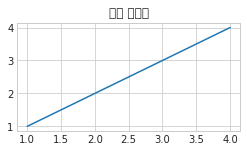

In [4]:
plt.figure(figsize = (4,2))
plt.plot([1,2,3,4],[1,2,3,4])
plt.title('한글 테스트')
plt.show()

In [5]:
!pip install catboost
from catboost import CatBoostRegressor, Pool

     |████████████████████████████████| 66.1MB 42kB/s 


## Get Data


In [6]:
a = pd.read_csv('/content/csv/group_가구.csv', encoding = 'utf-8', index_col = 0)
b = pd.read_csv('/content/csv/group_가전.csv', encoding = 'utf-8', index_col = 0)
c = pd.read_csv('/content/csv/group_건강기능.csv', encoding = 'utf-8', index_col = 0)
d = pd.read_csv('/content/csv/group_이미용.csv', encoding = 'utf-8', index_col = 0)
e = pd.read_csv('/content/csv/group_의류.csv', encoding = 'utf-8', index_col = 0)
f = pd.read_csv('/content/csv/group_잡화.csv', encoding = 'utf-8', index_col = 0)
g = pd.read_csv('/content/csv/group_주방.csv', encoding = 'utf-8', index_col = 0)
h = pd.read_csv('/content/csv/group_침구.csv', encoding = 'utf-8', index_col = 0)
i = pd.read_csv('/content/csv/group_속옷.csv', encoding = 'utf-8', index_col = 0)

In [7]:
data = pd.concat([a,b,c,d,e,f,g,h,i])
data['Mean'] = data.goods_Mean
data = data.drop(columns = ['goods_Mean','Std','goods_Std'])

In [8]:
j = i = pd.read_csv('/content/csv/group_생활용품.csv', encoding = 'utf-8', index_col = 0)
k = i = pd.read_csv('/content/csv/group_농수축.csv', encoding = 'utf-8', index_col = 0)
k['상품'] = k.상품명

In [9]:
df = pd.concat([j, k])
df = df.drop(columns = ['Std'])
data = pd.concat([data, df])
data = data.fillna('해당없음')
train_df = data.copy()

In [10]:
del a, b, c, d, e, f, g, h, i ,j,k, df

In [11]:
train_df.head()

,노출(분),상품명,상품군,판매단가,월,일,시,요일,휴일,프라임,파트,브랜드,분,취급액_로그,결제유형,성별,상품,단가,Mean
방송일시,,,,,,,,,,,,,,,,,,,
2019-02-01 22:00:00,20.0,보루네오 루나 유로탑 멀티수납형 LED 슈퍼싱글침대,가구,548000,2,1,22,Friday,0,4,First,보루네오,0,15.816855,해당없음,해당없음,슈퍼싱글침대,해당없음,16.596906
2019-02-01 22:00:00,20.0,보루네오 루나 유로탑 멀티수납형 LED 퀸침대,가구,598000,2,1,22,Friday,0,4,First,보루네오,0,14.998464,해당없음,해당없음,퀸침대,해당없음,16.133342
2019-02-01 22:00:00,20.0,보루네오 루나 유로탑 멀티수납형 LED 킹침대,가구,648000,2,1,22,Friday,0,4,First,보루네오,0,15.477731,해당없음,해당없음,킹침대,해당없음,16.199786
2019-02-01 22:20:00,20.0,보루네오 루나 유로탑 멀티수납형 LED 슈퍼싱글침대,가구,548000,2,1,22,Friday,0,4,Middle,보루네오,20,16.842645,해당없음,해당없음,슈퍼싱글침대,해당없음,16.596906
2019-02-01 22:20:00,20.0,보루네오 루나 유로탑 멀티수납형 LED 퀸침대,가구,598000,2,1,22,Friday,0,4,Middle,보루네오,20,16.689132,해당없음,해당없음,퀸침대,해당없음,16.133342


In [ ]:
submission = pd.read_excel('/content/csv/submission.xlsx', encoding = 'utf-8', index_col=0, skiprows = 1).iloc[:,1:]
submission.head()

In [ ]:
data = submission.copy()

## Define Functions

In [ ]:
def replace(df, replace_list):
    _df = df.copy()
    for l in replace_list:
        _df.상품명 = _df.상품명.str.replace(l, '', regex = False)
    _df.상품명 = _df.상품명.str.replace(' +', ' ')
    _df.상품명 = _df.상품명.str.lstrip()
    _df.상품명 = _df.상품명.str.rstrip()
    return _df

def separate(df, separate_list):
    _df = df.copy()
    for s in separate_list:
        _df.상품명 = _df.상품명.str.replace(s, f' {s} ', regex = False)
    _df.상품명 = _df.상품명.str.replace(' +', ' ')
    _df.상품명 = _df.상품명.str.lstrip()
    _df.상품명 = _df.상품명.str.rstrip()
    return _df

In [ ]:
def goods_name(x, goods_list):
    for s in x.split():
        if s in goods_list:
            return s

In [ ]:
def preprocessing(data):
    data.상품명 = data.상품명.str.replace(r'\d+[월]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[차]', '',)
    data.상품명 = data.상품명.str.replace(r'[시][즌]\d+', '',)
    data.상품명 = data.상품명.str.replace(r'[시][즌] \d+', '',)

    data.상품명 = data.상품명.str.replace(r'\d+[.]\d+[k][g]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[k][g]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[.]\d+[g]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[g]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[.]\d+[L]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[L]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[.]\d+[리][터]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[리][터]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[.]\d+[m]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[m]', '',)

    data.상품명 = data.상품명.str.replace(r'\d+[팩]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[박][스]', '',)
    data.상품명 = data.상품명.str.replace(r'\d+[미]', '')
    data.상품명 = data.상품명.str.replace(r'\d+[개]', '')
    data.상품명 = data.상품명.str.replace(r'\d+[포]', '')
    data.상품명 = data.상품명.str.replace(r'\d+[마][리]', '')

    data.상품명 = data.상품명.str.replace(r'\d+[종]', '',)

    data = replace(data, ['2018년','2018','18년','18','2019년','2019','19년','19'])

    return data

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Commom Features

### feature_시간

In [ ]:
date = pd.to_datetime(data.index)
data['월'] = date.strftime('%m')
data['일'] = date.strftime('%d')
data['시'] = date.strftime('%H')
data['분'] = date.strftime('%M')
data['요일'] = date.strftime('%A')

In [ ]:
## 타겟 데이터는 공휴일 없음!
def get_holiday(x):
    date = str(x.월) +'-'+ str(x.일)
    holiday = ['01-01', '02-04', '02-05', '02-06', '03-01', '05-05', '05-06', '05-12',
               '06-06', '08-15', '09-12', '09-13', '09-14', '10-03', '10-09', '12-25']
    if date in holiday :
        return 1
    else:
        return 0

data['공휴일'] = data.apply(lambda x: get_holiday(x), axis = 1)

In [ ]:
data['주말'] = data.apply(lambda x : 1 if x.요일 == 'Saturday' or x.요일 == 'Sunday' else 0, axis = 1)

In [ ]:
data['휴일'] = data.apply(lambda x : 1 if x.공휴일 ==1 or x.주말 == 1 else 0, axis = 1)

In [ ]:
del data['공휴일'], data['주말']

### feature_파트

In [23]:
expo_df = data.groupby(['월','일','상품명']).count()['상품군']
date_list = []
name_list = []

def exposure_num(x):
    date = str(x.월)+'/'+str(x.일)
    if date not in date_list:
        date_list.append(date)
        name_list.clear()

    name_list.append(x.상품명)
    
    return name_list.count(x.상품명)/(expo_df.loc[(x.월, x.일, x.상품명)])

data['파트'] = data.apply(lambda x: exposure_num(x), axis=1)

In [24]:
def part_(x):
    if x <= 0.5:
        return 'First'
    elif 0.5 < x < 1:
        return 'Middle'
    elif x == 1:
      return 'Later'

data['파트'] = data.파트.map(lambda x: part_(x))

### feature_결제유형

In [25]:
data.상품명 = data.상품명.str.replace('세일', '', regex = False)

In [26]:
data.상품명 = data.상품명.str.replace('(무)', '무이자', regex = False)
data.상품명 = data.상품명.str.replace('(일)', '일시불', regex = False)

data.상품명 = data.상품명.str.replace('무)', '무이자', regex = False)
data.상품명 = data.상품명.str.replace('일)', '일시불', regex = False)

data = separate(data, ['무이자', '일시불'])

def payment(x):
    if '일시불' in x:
        return '일시불'
    if '무이자' in x:
        return '무이자'
    else:
        return '해당없음'

data['결제유형'] = data.상품명.map(lambda x: payment(x))

data = replace(data, ['무이자', '일시불'])

### feature_성별

In [27]:
data.상품명 = data.상품명.str.replace('남성용', '남성', regex = False)
data.상품명 = data.상품명.str.replace('여성용', '여성', regex = False)
data.상품명 = data.상품명.str.replace('휘메일', '여성', regex = False)
data.상품명 = data.상품명.str.replace('남아', '아동', regex = False)
data.상품명 = data.상품명.str.replace('여성 아동', '아동', regex = False)
data.상품명 = data.상품명.str.replace('남성 아동', '아동', regex = False)

data = separate(data,['남성','여성','아동'])

def sex(x):
    if '남성' in x:
        return '남성'
    if '여성' in x:
        return '여성'
    if '아동' in x:
        return '아동'

data['성별'] = data.상품명.map(lambda x: sex(x))
data['성별'] = data.성별.map(lambda x: '해당없음' if type(x) != str else x)

In [28]:
df = data.copy()

### feature_브랜드

#### TrainSet 브랜드 전처리

In [29]:
def Brandset(group):
    """
    상품명에서 브랜드를 추출하는 함수
    대부분 상품명 첫 번째 단어에 브랜드가 위치해있다는 특징을 활용
    예외는 수작업으로 전처리
    """
    name_list= []
    df = data[data['상품군'] == group]
    for words in df['상품명']:
        name_list.append(words)

    brand_set= []
    for name in name_list:
        brand_set.append(name.split()[0])
    brand_set = set(brand_set)

    return brand_set

In [30]:
data = train_df.copy()

In [31]:
# 괄호
data.상품명 = data.상품명.str.replace('[', ' ', regex = False)
data.상품명 = data.상품명.str.replace(']', ' ', regex = False)
data.상품명 = data.상품명.str.replace('(', ' ', regex = False)
data.상품명 = data.상품명.str.replace(')', ' ', regex = False)

## 초특가
data.상품명 = data.상품명.str.replace('초특가', '')
data.상품명 = data.상품명.str.replace('일시불', '') 
data.상품명 = data.상품명.str.replace('무이자', '')

In [32]:
data.상품명 = data.상품명.str.replace('쿠첸', ' 쿠첸 ')
data.상품명 = data.상품명.str.replace('쿠쿠', ' 쿠쿠 ')

# 쿠쿠전기밥솥
data.상품명 = data.상품명.str.replace('도냄', '', regex = False)
data.상품명 = data.상품명.str.replace('CRP-QS107FG/FS', '', regex = False)
data.상품명 = data.상품명.str.replace('CRP-107FG/FS', '', regex = False)
data.상품명 = data.상품명.str.replace('QS', '', regex = False) 
data.상품명 = data.상품명.str.replace('블랙스톤', '', regex = False) 

# 쿠첸 압력밥솥
data.상품명 = data.상품명.str.replace('풀스텐', '', regex = False)
data.상품명 = data.상품명.str.replace('A1', '', regex = False)
data.상품명 = data.상품명.str.replace(' 쿠 ', '', regex = False)
data.상품명 = data.상품명.str.replace('신제품', '', regex = False)

# 린나이 가스레인지
data.상품명 = data.상품명.str.replace('자동불꽃조절', '')
data.상품명 = data.상품명.str.replace('간편쿡', '')
data.상품명 = data.상품명.str.replace('2구', '')
data.상품명 = data.상품명.str.replace('3구', '')

# 에코라믹
data.상품명 = data.상품명.str.replace('냄비세트', ' 냄비 세트')
data.상품명 = data.상품명.str.replace('프라이팬세트', ' 프라이팬 세트')
data.상품명 = data.상품명.str.replace('통주물', ' ')
data.상품명 = data.상품명.str.replace('스톤', ' ')

# 후라이팬
data.상품명 = data.상품명.str.replace('후라이팬', ' 프라이팬 ')

# 에어프라이어
data.상품명 = data.상품명.str.replace('대용량', '')
data.상품명 = data.상품명.str.replace('디지털', '')
data.상품명 = data.상품명.str.replace('듀얼쿡', '')


data.상품명 = data.상품명.str.replace('가스와이드그릴레인지', '가스와이드그릴')
data.상품명 = data.상품명.str.replace('스텐큐브', '')
data.상품명 = data.상품명.str.replace('멀티쿡', '멀티쿠커')
data.상품명 = data.상품명.str.replace('팬지', '')

# 도마
data.상품명 = data.상품명.str.replace('도마', ' 도마 ')

data.상품명 = data.상품명.str.replace('대용량', '')

# 재질
data.상품명 = data.상품명.str.replace('스텐', ' 스텐 ')
data.상품명 = data.상품명.str.replace('유리', ' 유리 ')

data.상품명 = data.상품명.str.replace('밀폐용기', ' 밀폐용기')
data.상품명 = data.상품명.str.replace('플랫타입', '')

data.상품명 = data.상품명.str.replace('멀티', '')

data.상품명 = data.상품명.str.replace('만능', '')

def kitchen(x):
    if x.상품군 == '주방':
        x.상품명 = x.상품명.replace('옛', '')
        x.상품명 = x.상품명.replace('멀티', '')
        x.상품명 = x.상품명.replace('크로커다일', '')
    else:
        x.상품명 = x.상품명
    return x

data = data.apply(lambda x: kitchen(x), axis = 1)

data.상품명 = data.상품명.str.replace(' +', ' ')
data.상품명 = data.상품명.str.lstrip()
data.상품명 = data.상품명.str.rstrip()

In [33]:
data.상품명 = data.상품명.str.replace('(무)', '무이자', regex = False)
data.상품명 = data.상품명.str.replace('무)', '무이자', regex = False)
data.상품명 = data.상품명.str.replace('무이자', ' 무이자 ', regex = False)
data.상품명 = data.상품명.str.replace('(일)', '일시불', regex = False)
data.상품명 = data.상품명.str.replace('일)', '일시불', regex = False)
data.상품명 = data.상품명.str.replace('일시불', ' 일시불 ', regex = False)
data.상품명 = data.상품명.str.replace('해피콜', '해피콜 ', regex = False)
data.상품명 = data.상품명.str.replace('am', 'am ', regex = False)
data.상품명 = data.상품명.str.replace('베스트 하임', '베스트하임', regex = False)
data.상품명 = data.상품명.str.replace('쿠진', '쿠진 ', regex = False)
data.상품명 = data.상품명.str.replace('국내생산', '', regex = False)
data.상품명 = data.상품명.str.replace('국내제조', '', regex = False)
data.상품명 = data.상품명.str.replace('프랑스직수입', '', regex = False)
data.상품명 = data.상품명.str.replace('서장훈', '서장훈 ', regex = False)
data.상품명 = data.상품명.str.replace('휴롬', '휴롬 ', regex = False)
data.상품명 = data.상품명.str.replace('형', '', regex = False)
data.상품명 = data.상품명.str.replace('19년', '')
data.상품명 = data.상품명.str.replace('1세트', '')
data.상품명 = data.상품명.str.replace('2019년', '')
data.상품명 = data.상품명.str.replace('2세트', '')
data.상품명 = data.상품명.str.replace('20', '')

In [34]:
setKitchen = Brandset('주방')

In [35]:
setKitchen.remove('뉴')
setKitchen.remove('전기식')
setKitchen.add('클레린')
setKitchen.add('드럼쿡')

In [36]:
data.상품명 = data.상품명.str.replace('1등급', '')
data.상품명 = data.상품명.str.replace('221L_', '')
data.상품명 = data.상품명.str.replace('467L_', '')
data.상품명 = data.상품명.str.replace('국내제조', '')
data.상품명 = data.상품명.str.replace('LG', 'LG ')
data.상품명 = data.상품명.str.replace('삼성', '삼성 ')
data.상품명 = data.상품명.str.replace('딤채', '딤채 ')

In [37]:
setDigital = Brandset('가전')

In [38]:
def clothes(x):
    if x.상품군 == '의류':
        x.상품명 = x.상품명.replace('SS', 'S/S')
        x.상품명 = x.상품명.replace('K-SWIS/S', 'K-SWISS')
        x.상품명 = x.상품명.replace('FW', 'F/W')
        x.상품명 = x.상품명.replace('S/S', ' S/S ')
        x.상품명 = x.상품명.replace('F/W', ' F/W ')

        x.상품명 = x.상품명.replace('기모', ' 기모 ')
        x.상품명 = x.상품명.replace('니트', ' 니트 ')
        x.상품명 = x.상품명.replace('팬츠', ' 팬츠 ')        
        x.상품명 = x.상품명.replace('데님 팬츠', ' 데님 ')
        x.상품명 = x.상품명.replace('티셔츠', ' 티셔츠 ')
        x.상품명 = x.상품명.replace('밴딩', ' 밴딩 ')

        x.상품명 = x.상품명.replace('코트', ' 코트 ')
        x.상품명 = x.상품명.replace('밍크', ' 밍크 ')
        x.상품명 = x.상품명.replace('그레이스', ' 그레이스 ')
    else:
        x.상품명 = x.상품명
    return x

data = data.apply(lambda x: clothes(x), axis = 1)

data.상품명 = data.상품명.str.replace('CERINI by PAT', 'CERINI_by_PAT') 
data.상품명 = data.상품명.str.replace('USPA', 'USPA ')

## 마르엘라로사티
data.상품명 = data.상품명.str.replace('풀스킨', '')
data.상품명 = data.상품명.str.replace('휘메일', '') #?

data.상품명 = data.상품명.str.replace('트랙수트', ' 트랙수트 ')

data.상품명 = data.상품명.str.replace('19', '')
data.상품명 = data.상품명.str.replace('2019', '')
data.상품명 = data.상품명.str.replace('20', '')
data.상품명 = data.상품명.str.replace('F/W', '')
data.상품명 = data.상품명.str.replace('S/S', '')

In [39]:
setClothes = Brandset('의류')

In [40]:
data.상품명 = data.상품명.str.replace('ARS10%', '')
data.상품명 = data.상품명.str.replace('세일%', '')
data.상품명 = data.상품명.str.replace('완벽더블', '')
data.상품명 = data.상품명.str.replace('라쉬반', '라쉬반 ')

In [41]:
setInner = Brandset('속옷')

In [42]:
data.상품명 = data.상품명.str.replace('무', '')
data.상품명 = data.상품명.str.replace('일', '')

In [43]:
setStuff = Brandset('잡화')

In [44]:
data.상품명 = data.상품명.str.replace('대형', '', regex = False)
data.상품명 = data.상품명.str.replace('더블+더블', '', regex = False)
data.상품명 = data.상품명.str.replace('더블+싱글', '', regex = False)
data.상품명 = data.상품명.str.replace('더블사이즈', '', regex = False)
data.상품명 = data.상품명.str.replace('싱글사이즈', '', regex = False)
data.상품명 = data.상품명.str.replace('싱글+싱글', '', regex = False)
data.상품명 = data.상품명.str.replace('점보', '', regex = False)
data.상품명 = data.상품명.str.replace('점보특대형', '', regex = False)
data.상품명 = data.상품명.str.replace('점보형', '', regex = False)
data.상품명 = data.상품명.str.replace('중형', '', regex = False)
data.상품명 = data.상품명.str.replace('퀸+싱글', '', regex = False)
data.상품명 = data.상품명.str.replace('킹+싱글', '', regex = False)
data.상품명 = data.상품명.str.replace('퀸+퀸', '', regex = False)
data.상품명 = data.상품명.str.replace('퀸사이즈', '', regex = False)
data.상품명 = data.상품명.str.replace('퀸+싱글', '', regex = False)
data.상품명 = data.상품명.str.replace('킹사이즈', '', regex = False)
data.상품명 = data.상품명.str.replace('특대', '', regex = False)
data.상품명 = data.상품명.str.replace('1+1', '', regex = False)
data.상품명 = data.상품명.str.replace('3D매쉬', '', regex = False)
data.상품명 = data.상품명.str.replace('1세트', '', regex = False)
data.상품명 = data.상품명.str.replace('5세트', '', regex = False)
data.상품명 = data.상품명.str.replace('ALL', '', regex = False)
data.상품명 = data.상품명.str.replace('D)', '', regex = False)
data.상품명 = data.상품명.str.replace('OK', '', regex = False)
data.상품명 = data.상품명.str.replace('국내제작', '', regex = False)
data.상품명 = data.상품명.str.replace('국내제조', '', regex = False)
data.상품명 = data.상품명.str.replace('기본구성', '', regex = False)
data.상품명 = data.상품명.str.replace('파격가', '', regex = False)
data.상품명 = data.상품명.str.replace('초특가', '', regex = False)
data.상품명 = data.상품명.str.replace('[실속패키지]', '', regex = False)
data.상품명 = data.상품명.str.replace('[풀패키지]', '', regex = False)
data.상품명 = data.상품명.str.replace('12.5m x 3롤', '', regex = False)
data.상품명 = data.상품명.str.replace('12.5m x 2롤', '', regex = False)
data.상품명 = data.상품명.str.replace('12.5m x 1롤', '', regex = False)
data.상품명 = data.상품명.str.replace('2세트', '', regex = False)
data.상품명 = data.상품명.str.replace('KF94', '', regex = False)
data.상품명 = data.상품명.str.replace('엔웰스', '엔웰스 ', regex = False)
data.상품명 = data.상품명.str.replace('D', '', regex = False)
data.상품명 = data.상품명.str.replace('New', '', regex = False)
data.상품명 = data.상품명.str.replace('년', '', regex = False)
data.상품명 = data.상품명.str.replace('올바로', '올바로 ', regex = False)
data.상품명 = data.상품명.str.replace('까사마루', '까사마루 ', regex = False)
data.상품명 = data.상품명.str.replace('붙이는', '', regex = False)
data.상품명 = data.상품명.str.replace('레스트업', '', regex = False)
data.상품명 = data.상품명.str.replace('가 ', '', regex = False)
data.상품명 = data.상품명.str.replace('대 ', '', regex = False)
data.상품명 = data.상품명.str.replace('올뉴', '', regex = False)
data.상품명 = data.상품명.str.replace('실속패키지', '', regex = False)
data.상품명 = data.상품명.str.replace('풀패키지', '', regex = False)

In [45]:
setLife = Brandset('생활용품')  # 일월, 한일 추가

In [46]:
setLife.remove('중')
setLife.remove('월')
setLife.remove('한')
setLife.remove('LG')
setLife.add('LG생활건강')
setLife.add('일월')
setLife.add('한일')

In [47]:
data.상품명 = data.상품명.str.replace('3인용', '', regex = False)
data.상품명 = data.상품명.str.replace('4인용', '', regex = False)
data.상품명 = data.상품명.str.replace('장수', '장수 ', regex = False)
data.상품명 = data.상품명.str.replace('SET', '', regex = False)
data.상품명 = data.상품명.str.replace('뉴', '', regex = False)

In [48]:
setFurniture = Brandset('가구')

In [49]:
data.상품명 = data.상품명.str.replace('NEW프리미엄', '', regex = False)
data.상품명 = data.상품명.str.replace('TS', 'TS ', regex = False)

In [50]:
setBeauty = Brandset('이미용')
setBeauty.remove('시크릿')
setBeauty.add('라메종')
setBeauty.remove('프리미엄')
setBeauty.add('클린샤워')

In [51]:
data.상품명 = data.상품명.str.replace('"', '', regex = False)
data.상품명 = data.상품명.str.replace('농약', '', regex = False)
data.상품명 = data.상품명.str.replace('단하루', '', regex = False)
data.상품명 = data.상품명.str.replace('직매입', '', regex = False)
data.상품명 = data.상품명.str.replace('특집', '', regex = False)
data.상품명 = data.상품명.str.replace('100%리얼', '100%리얼 ', regex = False)
data.상품명 = data.상품명.str.replace('한삼인', '한삼인 ', regex = False)

In [52]:
setHealth = Brandset('건강기능')
setHealth.remove('한국인')
setHealth.add('비에날씬')

In [53]:
setBed = Brandset('침구')
setBed.remove('리앤코리아')

In [54]:
food = ['팽현숙', '전철우', '농협', '바다원', '본죽', '수협', '강레오', 'SPC 삼립',
        '김선영', '김정문', '김정배', '송도순', '명인', '목우촌', '바다먹자',
        '뽕셰프', '산머루농원', '소들녘', '오세득', '유귀열', '이경제', '이만기',
        '이보은', '이봉원', '이정섭', '임성근', '장보고', '조방할매', '참바다',
        '천수봉명인', '최인선', '피시원', '하늘내린', '하동', '하림', '현대어찬', '황토방']

In [55]:
kitchen = list(setKitchen)
digital = list(setDigital)
clothes = list(setClothes)
inner = list(setInner)
stuff = list(setStuff)
life = list(setLife)
furniture = list(setFurniture)
beauty = list(setBeauty)
health = list(setHealth)
bed = list(setBed)

In [56]:
clothes.remove('CERINI_by_PAT')
clothes.append('CERINI by PAT')

In [57]:
def Brand(group, name):
    for brand in group:
        if brand in name:
            return brand

#### submission에 전처리 적용하기

In [58]:
data = df.copy()

In [59]:
brand_list = []
for i in range(len(data)):
    group = data['상품군'].iloc[i]
    name = data['상품명'].iloc[i]
    
    if group == '주방':
        brand_list.append(Brand(kitchen, name))
    elif group == '가전':
        brand_list.append(Brand(digital, name))
    elif group == '의류':
        brand_list.append(Brand(clothes, name))
    elif group == '속옷':
        brand_list.append(Brand(inner, name))
    elif group == '잡화':
        brand_list.append(Brand(stuff, name))
    elif group == '생활용품':
        brand_list.append(Brand(life, name))
    elif group == '가구':
        brand_list.append(Brand(furniture, name))
    elif group == '이미용':
        brand_list.append(Brand(beauty, name))
    elif group == '건강기능':
        brand_list.append(Brand(health, name))
    elif group == '침구':
        brand_list.append(Brand(bed, name))
    elif group == '농수축':
        brand_list.append(Brand(food, name))
    else:
        brand_list.append('무형')

In [60]:
data['브랜드'] = brand_list

In [61]:
data.브랜드 = data.브랜드.map(lambda x: 'Trainset에 존재하지 않습니다' if type(x) != str else x)

In [62]:
test_df = data.copy()

In [63]:
test_df.head()

,마더코드,상품코드,상품명,상품군,판매단가,취급액,월,일,시,분,요일,휴일,파트,결제유형,성별,브랜드
방송일시,,,,,,,,,,,,,,,,
2020-06-01 06:20:00,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,06,01,06,20,Monday,0,First,해당없음,남성,Trainset에 존재하지 않습니다
2020-06-01 06:40:00,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,06,01,06,40,Monday,0,Middle,해당없음,남성,Trainset에 존재하지 않습니다
2020-06-01 07:00:00,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,06,01,07,00,Monday,0,Later,해당없음,남성,Trainset에 존재하지 않습니다
2020-06-01 07:20:00,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,06,01,07,20,Monday,0,First,해당없음,해당없음,쿠미투니카
2020-06-01 07:40:00,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,06,01,07,40,Monday,0,Middle,해당없음,해당없음,쿠미투니카


In [64]:
data_group = {}
for g in set(data.상품군):
    data_group.update({g: data[data.상품군 == g]})

del data

In [65]:
data_group['주방'].head()

,마더코드,상품코드,상품명,상품군,판매단가,취급액,월,일,시,분,요일,휴일,파트,결제유형,성별,브랜드
방송일시,,,,,,,,,,,,,,,,
2020-06-01 09:20:00,100638,201956,램프쿡 자동회전냄비,주방,109000,NaN,06,01,09,20,Monday,0,First,해당없음,해당없음,램프쿡
2020-06-01 09:40:00,100638,201956,램프쿡 자동회전냄비,주방,109000,NaN,06,01,09,40,Monday,0,Middle,해당없음,해당없음,램프쿡
2020-06-01 10:00:00,100638,201956,램프쿡 자동회전냄비,주방,109000,NaN,06,01,10,00,Monday,0,Later,해당없음,해당없음,램프쿡
2020-06-02 07:20:00,100255,200867,한일 대용량 레드 스텐 분쇄믹서기,주방,119800,NaN,06,02,07,20,Tuesday,0,First,해당없음,해당없음,스텐
2020-06-02 07:50:00,100255,200867,한일 대용량 레드 스텐 분쇄믹서기,주방,119800,NaN,06,02,07,50,Tuesday,0,Later,해당없음,해당없음,스텐


In [66]:
model = CatBoostRegressor(iterations = 2000,
                          loss_function="MAPE",
                          eval_metric="MAPE",
                          learning_rate=0.1,
                          early_stopping_rounds=500,
                          random_seed = 123457,
                          )

## 의류

In [67]:
data = data_group['의류'].copy()

### feature_상품

In [68]:
clothes = ['니트/스웨터','카디건','원피스','티셔츠','블라우스','셔츠','점퍼','재킷','코트','맨투맨',
          '데님','스커트','레깅스','바지','트레이닝복','조끼','정장세트','코디세트']

data.상품명 = data.상품명.str.replace('팬츠', '바지')
data.상품명 = data.상품명.str.replace('데님바지','데님')
data.상품명 = data.상품명.str.replace('데님 바지', '데님')

data.상품명 = data.상품명.str.replace('자켓', '재킷')

data.상품명 = data.상품명.str.replace('패딩코트', '점퍼')
data.상품명 = data.상품명.str.replace('패딩', '점퍼')
data.상품명 = data.상품명.str.replace('벤치코트', '점퍼')
data.상품명 = data.상품명.str.replace('구스다운', '점퍼')
data.상품명 = data.상품명.str.replace('하드쉘', '점퍼')

data.상품명 = data.상품명.str.replace('점퍼 바지', '바지')
data.상품명 = data.상품명.str.replace('점퍼 재킷', '재킷')


data.상품명 = data.상품명.str.replace('트레이닝', '트레이닝복')
data.상품명 = data.상품명.str.replace('트랙수트', '트레이닝복')
data.상품명 = data.상품명.str.replace('액티비티', '트레이닝복')
data.상품명 = data.상품명.str.replace('트랙', '트레이닝복')
data.상품명 = data.상품명.str.replace('네이처 수트', '트레이닝복')

data.상품명 = data.상품명.str.replace('니트', '니트/스웨터')
data.상품명 = data.상품명.str.replace('기모티', '니트/스웨터')
data.상품명 = data.상품명.str.replace('모크넥', '니트/스웨터')
data.상품명 = data.상품명.str.replace('터틀넥', '니트/스웨터')

data.상품명 = data.상품명.str.replace('밍크', '코트')
data.상품명 = data.상품명.str.replace('무스탕', '코트')

data.상품명 = data.상품명.str.replace('시스루앙상블', '점퍼')
data.상품명 = data.상품명.str.replace('린넨 베스트 세트', '조끼')
data.상품명 = data.상품명.str.replace('하트 라인핏', '레깅스')
data.상품명 = data.상품명.str.replace('풀코디', '코디세트')
data.상품명 = data.상품명.str.replace('이지웨어', '홈웨어')

data = separate(data, clothes)

data['상품'] = data.상품명.map(lambda x: goods_name(x, clothes))
#data['상품'] = data.상품.map(lambda x: '코디세트' if type(x) != str else x)

In [69]:
def change_group(x, goods_list, group_list):
    for i in range(len(goods_list)):
        if goods_list[i] in x.상품명:
            x.상품군 = group_list[i]
            x.상품 = goods_list[i]
    return x

data = data.apply(lambda x: change_group(x, ['레깅스','홈웨어'],['속옷','속옷']), axis=1)

In [70]:
df_의류 = data.copy()

## 속옷

In [71]:
data = data_group['속옷'].copy()

### feature_상품

In [72]:
goods_속옷 = ['드로즈','트렁크','브라탑','언더셔츠','브라팬티','동내의',
              '레깅스','보정속옷','베이스레이어', '홈웨어']


data.상품명 = data.상품명.str.replace('란쥬', '보정속옷')
data.상품명 = data.상품명.str.replace('보정', '보정속옷')
data.상품명 = data.상품명.str.replace('코르셋', '보정속옷')
data.상품명 = data.상품명.str.replace('슬리머 패키지', '보정속옷')
data.상품명 = data.상품명.str.replace('쉐이퍼 패키지', '보정속옷')
data.상품명 = data.상품명.str.replace('매직니퍼팬티', '보정속옷')
data.상품명 = data.상품명.str.replace('쉐이핑 거들팬티', '보정속옷')
data.상품명 = data.상품명.str.replace('하이웨이스트', '보정속옷')
data.상품명 = data.상품명.str.replace('하이웨스트', '보정속옷')
data.상품명 = data.상품명.str.replace('코튼 맥시 팬티', '보정속옷') ## 딱히 넣을 데가 없음

data.상품명 = data.상품명.str.replace('레이스 패키지', '브라패키지')
data.상품명 = data.상품명.str.replace('브라 패키지', '브라패키지')
data.상품명 = data.상품명.str.replace('브라패키지', '브라팬티')
data.상품명 = data.상품명.str.replace('브라 컬렉션', '브라팬티')
data.상품명 = data.상품명.str.replace('브라렛 패키지', '브라팬티')
data.상품명 = data.상품명.str.replace('브래팬티', '브라팬티')
data.상품명 = data.상품명.str.replace('브라세트', '브라팬티')
data.상품명 = data.상품명.str.replace('브라세트', '브라팬티')
data.상품명 = data.상품명.str.replace('데오브라', '브라팬티')
data.상품명 = data.상품명.str.replace('오모떼 레이스 파운데이션 브라',
                                      '오모떼 레이스 파운데이션 브라팬티')
data.상품명 = data.상품명.str.replace('리복 스피드윅 에어리라이트 브라 & 숏츠 패키지',
                                      '리복 스피드윅 에어리라이트 브라팬티 & 숏츠 패키지')
data.상품명 = data.상품명.str.replace('베르사유 노와이어 컬렉션 브라',
                                      '베르사유 노와이어 컬렉션 브라팬티')
data.상품명 = data.상품명.str.replace('퀸 컬렉션 프리미엄 브라',
                                      '퀸 컬렉션 프리미엄 브라팬티')



data.상품명 = data.상품명.str.replace('이지웨어', '홈웨어')
data.상품명 = data.상품명.str.replace('이지탑', '홈웨어')
data.상품명 = data.상품명.str.replace('언더탑', '홈웨어')
data.상품명 = data.상품명.str.replace('이너웨어', '홈웨어')
data.상품명 = data.상품명.str.replace('원피스', '홈웨어')
data.상품명 = data.상품명.str.replace('런닝', '홈웨어')

data.상품명 = data.상품명.str.replace('웜웨어', '동내의')

data.상품명 = data.상품명.str.replace('쉐이핑 팬티 10+2종 패키지', '보정속옷', regex = False)
data.상품명 = data.상품명.str.replace('레이스 브라렛', '브라팬티')
data.상품명 = data.상품명.str.replace('브라 14종 패키지', '브라팬티')

data = separate(data, goods_속옷)

data['상품'] = data.상품명.map(lambda x: goods_name(x, goods_속옷))

### feature_단가

In [73]:
sametime_count = data.groupby(['월','일','시','분','브랜드','성별','결제유형']).count()['상품명'].to_frame()
sametime_df_ = data.groupby(['월','일','시','분','브랜드','성별','결제유형','상품명']).mean()['판매단가'].to_frame()

sametime_df = sametime_df_[sametime_count.상품명 > 1]
sametime_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


판매단가
월  일  시  분  브랜드                 성별   결제유형 상품명                           
06 04 19 20 Trainset에 존재하지 않습니다 남성   해당없음 보디가드 남성 드로즈 12종          49900
                                          보디가드 남성 트렁크 8종           49900
         40 Trainset에 존재하지 않습니다 남성   해당없음 보디가드 남성 드로즈 12종          49900
                                          보디가드 남성 트렁크 8종           49900
      20 00 Trainset에 존재하지 않습니다 남성   해당없음 보디가드 남성 드로즈 12종          49900
...                                                                  ...
   29 22 40 Trainset에 존재하지 않습니다 해당없음 해당없음 프로스펙스 2020 퍼포먼스 트렁크 패키지  49900
                                          프로스펙스 2020 퍼포먼스 홈웨어 패키지  49900
      23 00 Trainset에 존재하지 않습니다 해당없음 해당없음 프로스펙스 2020 퍼포먼스 드로즈 패키지  49900
                                          프로스펙스 2020 퍼포먼스 트렁크 패키지  49900
                                          프로스펙스 2020 퍼포먼스 홈웨어 패키지  49900

[117 rows x 1 columns]

In [74]:
def cheap_expensive(x):
    try: 
        idx_list = sametime_df.loc[(x.월, x.일, x.시, x.분, x.브랜드, x.성별)].values.reshape(-1).tolist()
        idx_list.sort()
        idx = idx_list.index(x.판매단가)/(len(idx_list)-1)
        if idx == 0:
            return '하'
        if idx == 0.5:
            return '중'
        if idx == 1:
            return '상'
    except KeyError:
        return '해당없음'

data['단가'] = data.apply(lambda x: cheap_expensive(x), axis=1)

In [75]:
df_속옷 = data.copy()

## 잡화

In [76]:
data = data_group['잡화'].copy()

### Preprocessing & feature_상품

In [77]:
goods_잡화 = ['백팩','크로스백','숄더백','토트백','클러치백','여행가방','가방세트',
              '샌들','스니커즈','단화','운동화','부츠','힐/펌프스','캐쥬얼슈즈',
              '목걸이','팔찌','반지','귀걸이','골드바','목걸이팔찌','팔찌반지','주얼리세트',
              '모자','선글라스','워치','지갑','장갑']

# data.상품명 = data.상품명.str.replace('[+]\w+', '')
# data.상품명 = data.상품명.str.replace('\([^)]*\)', '')

data.상품명 = data.상품명.str.replace('크로스바디백', '크로스백')
data.상품명 = data.상품명.str.replace('크로스바디 백', '크로스백')
data.상품명 = data.상품명.str.replace('크로스 바디백', '크로스백')
data.상품명 = data.상품명.str.replace('클래식 스퀘어 크로스', '크로스백')
data.상품명 = data.상품명.str.replace('크로스 백', '크로스백')
data.상품명 = data.상품명.str.replace('파일백', '크로스백')
data.상품명 = data.상품명.str.replace('투웨이백', '크로스백')

data.상품명 = data.상품명.str.replace('체인숄더', '숄더백')
data.상품명 = data.상품명.str.replace('체인백', '숄더백')
data.상품명 = data.상품명.str.replace('체인숄더', '숄더백')
data.상품명 = data.상품명.str.replace('체인 숄더', '숄더백')
data.상품명 = data.상품명.str.replace('호보백', '숄더백')
data.상품명 = data.상품명.str.replace('버킷 드로잉 백', '숄더백')
data.상품명 = data.상품명.str.replace('쇼퍼백', '숄더백')
data.상품명 = data.상품명.str.replace('버켓백', '숄더백')
data.상품명 = data.상품명.str.replace('버켓 백', '숄더백')
data.상품명 = data.상품명.str.replace('버킷백', '숄더백')

data.상품명 = data.상품명.str.replace('노벨라백', '토트백')
data.상품명 = data.상품명.str.replace('미란다백', '토트백')
data.상품명 = data.상품명.str.replace('사첼백', '토트백')
data.상품명 = data.상품명.str.replace('사첼', '토트백')
data.상품명 = data.상품명.str.replace('모터백', '토트백')
data.상품명 = data.상품명.str.replace('핸드백', '토트백')
data.상품명 = data.상품명.str.replace('스퀘어백', '토트백')
data.상품명 = data.상품명.str.replace('캐리올', '토트백')
data.상품명 = data.상품명.str.replace('피닉스 보스턴', '토트백')
data.상품명 = data.상품명.str.replace('메디오백', '토트백')

data.상품명 = data.상품명.str.replace('리스틀릿', '클러치백')
data.상품명 = data.상품명.str.replace('웨이스트백', '클러치백')

data.상품명 = data.상품명.str.replace('플라이트백', '백팩')

data.상품명 = data.상품명.str.replace('백 4종', '가방세트')
data.상품명 = data.상품명.str.replace('백 3종세트', '가방세트')
data.상품명 = data.상품명.str.replace('남성 화 3종', '가방세트')

data.상품명 = data.상품명.str.replace('헤라 컬렉션', '주얼리세트')
data.상품명 = data.상품명.str.replace('주얼리', '주얼리세트')

data.상품명 = data.상품명.str.replace('러닝화', '운동화')
data.상품명 = data.상품명.str.replace('워킹화', '운동화')
data.상품명 = data.상품명.str.replace('트레킹화', '운동화')
data.상품명 = data.상품명.str.replace('방한화', '운동화')

data.상품명 = data.상품명.str.replace('로퍼', '단화')
data.상품명 = data.상품명.str.replace('슬립온', '단화')

data.상품명 = data.상품명.str.replace('펌프스', '힐/펌프스')

#data.상품명 = data.상품명.str.replace('', '힐/펌프스')

data = separate(data, goods_잡화)

data.상품명 = data.상품명.str.replace('숄더 ', '숄더백')
data.상품명 = data.상품명.str.replace('목걸이 팔찌', '목걸이팔찌')
data.상품명 = data.상품명.str.replace('팔찌 반지', '팔찌반지')


data['상품'] = data.상품명.map(lambda x: goods_name(x, goods_잡화))
data['상품'] = data.상품.map(lambda x: '패션소품' if type(x) != str else x)

In [78]:
set(data[data.상품.isnull()].상품명)

set()

In [79]:
sametime_count = data.groupby(['월','일','시','분','브랜드','성별','결제유형']).count()['상품명'].to_frame()
sametime_df_ = data.groupby(['월','일','시','분','브랜드','성별','결제유형','상품명']).mean()['판매단가'].to_frame()

sametime_df = sametime_df_[sametime_count.상품명 > 1]
sametime_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


판매단가
월  일  시  분  브랜드  성별   결제유형 상품명                                          
06 06 08 20 구찌   해당없음 해당없음 구찌 NEW 럭셔리스타 선글라스 GG0232SK             158000
                           구찌 더블G 오버 선글라스                         458000
                           구찌 마이크로 씨마 GG플랩 2단 장 지갑                750000
                           구찌 마이크로씨마 크로스백                        1790000
            프라다  해당없음 해당없음 프라다 레터링 카메라백                          1090000
...                                                                  ...
   30 13 50 루이띠에 해당없음 해당없음 [루이띠에] 24K 999 순금 11.25g 더블 링크 체인 팔찌  1430000
                           [루이띠에] 24K 999 순금 11.25g 샤인 볼륨 반지     1430000
                           [루이띠에] 24K 999 순금 18.75g 골드바 목걸이      2230000
                           [루이띠에] 24K 999 순금 18.75g 스페이스 뱅글 팔찌   2230000
                           [루이띠에] 24K 999 순금 37.5g 골드바 목걸이       4320000

[172 rows x 1 columns]

In [80]:
def cheap_expensive(x):
    try: 
        idx_list = sametime_df.loc[(x.월, x.일, x.시, x.분, x.브랜드, x.성별)].values.reshape(-1).tolist()
        idx_list.sort()
        idx = idx_list.index(x.판매단가)/(len(idx_list)-1)
        if idx == 0:
            return '하'
        if idx == 0.5:
            return '중'
        if idx == 1:
            return '상'
    except KeyError:
        return '해당없음'

data['단가'] = data.apply(lambda x: cheap_expensive(x), axis=1)

In [81]:
df_잡화 = data.copy()

## 주방

In [82]:
data = data_group['주방'].copy()

### feature_상품

In [83]:
clothes = ['전기밥솥','가스레인지','에어프라이어','주방가전',
           '믹서기','그릴','식기','잔/컵','냄비/솥',
           '프라이팬','주전자/티포트','보관/밀폐용기','조리기구','하이브리드','주방잡화']

data.상품명 = data.상품명.str.replace('블랜더', '믹서기')
data.상품명 = data.상품명.str.replace('텀블러 믹서기', '믹서기')
data.상품명 = data.상품명.str.replace('믹서를 품은 텀블러', '믹서기')
data.상품명 = data.상품명.str.replace('다지기', '믹서기')
data.상품명 = data.상품명.str.replace('블랜더', '믹서기')
data.상품명 = data.상품명.str.replace('블렌더', '믹서기')
data.상품명 = data.상품명.str.replace('홈밀맷돌', '믹서기')

data.상품명 = data.상품명.str.replace('압력밥솥', '전기밥솥')

data.상품명 = data.상품명.str.replace('용기', '보관/밀폐용기')
data.상품명 = data.상품명.str.replace('후레쉬', '보관/밀폐용기')
data.상품명 = data.상품명.str.replace('유로오븐글라스', '보관/밀폐용기')

data.상품명 = data.상품명.str.replace('홈세트', '식기')
data.상품명 = data.상품명.str.replace('디너세트', '식기')

data.상품명 = data.상품명.str.replace('도마', '조리기구')
data.상품명 = data.상품명.str.replace('참소쿠리', '조리기구')
data.상품명 = data.상품명.str.replace('칼블럭', '조리기구')

data.상품명 = data.상품명.str.replace('텀블러', '잔/컵')
data.상품명 = data.상품명.str.replace('보온병', '잔/컵')

data.상품명 = data.상품명.str.replace('티포트', '주전자/티포트')
data.상품명 = data.상품명.str.replace('티메이커', '주전자/티포트')

data.상품명 = data.상품명.str.replace('냄비', '냄비/솥')
data.상품명 = data.상품명.str.replace('가마솥', '냄비/솥')

data.상품명 = data.상품명.str.replace('후라이팬', '프라이팬')
data.상품명 = data.상품명.str.replace('실버팬', '프라이팬')
data.상품명 = data.상품명.str.replace('양면팬', '프라이팬')

data.상품명 = data.상품명.str.replace('행주', '주방잡화')
data.상품명 = data.상품명.str.replace('수세미', '주방잡화')
data.상품명 = data.상품명.str.replace('지퍼백', '주방잡화')
data.상품명 = data.상품명.str.replace('싱크선반', '주방잡화')


data.상품명 = data.상품명.str.replace('압력솥', '전기밥솥')
data.상품명 = data.상품명.str.replace('채칼', '조리기구')

data = separate(data, clothes)

data['상품'] = data.상품명.map(lambda x: goods_name(x, clothes))
data['상품'] = data.상품.map(lambda x: '주방가전' if type(x) != str else x)

### feature_단가

In [84]:
sametime_count = data.groupby(['월','일','시','분','브랜드','상품','결제유형']).count()['상품명'].to_frame()
sametime_df_ = data.groupby(['월','일','시','분','브랜드','상품','결제유형','상품명']).mean()['판매단가'].to_frame()

sametime_df = sametime_df_[sametime_count.상품명 > 1]
sametime_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


판매단가
월  일  시  분  브랜드 상품   결제유형 상품명                                     
06 02 13 20 쿠쿠  전기밥솥 해당없음 CRP-P0610FD 쿠쿠 전기밥솥 6인용(QS) 2020  208000
                          CRP-QS107FG/FS 쿠쿠 전기밥솥 10인용 2020  218000
         40 쿠쿠  전기밥솥 해당없음 CRP-P0610FD 쿠쿠 전기밥솥 6인용(QS) 2020  208000
                          CRP-QS107FG/FS 쿠쿠 전기밥솥 10인용 2020  218000
      14 00 쿠쿠  전기밥솥 해당없음 CRP-P0610FD 쿠쿠 전기밥솥 6인용(QS) 2020  208000
...                                                            ...
   30 21 20 쿠쿠  전기밥솥 해당없음 CRP-QS107FG/FS 쿠쿠 전기밥솥 10인용 2020  218000
         40 쿠쿠  전기밥솥 해당없음 CRP-P0610FD 쿠쿠 전기밥솥 6인용(QS) 2020  208000
                          CRP-QS107FG/FS 쿠쿠 전기밥솥 10인용 2020  218000
      22 00 쿠쿠  전기밥솥 해당없음 CRP-P0610FD 쿠쿠 전기밥솥 6인용(QS) 2020  208000
                          CRP-QS107FG/FS 쿠쿠 전기밥솥 10인용 2020  218000

[96 rows x 1 columns]

In [85]:
def cheap_expensive(x):
    try: 
        idx_list = sametime_df.loc[(x.월, x.일, x.시, x.분, x.브랜드, x.결제유형)].values.reshape(-1).tolist()
        idx_list.sort()
        idx = idx_list.index(x.판매단가)/(len(idx_list)-1)
        if idx == 0:
            return '하'
        if idx == 0.5:
            return '중'
        if idx == 1:
            return '상'
    except KeyError:
        return '해당없음'

data['단가'] = data.apply(lambda x: cheap_expensive(x), axis=1)

In [86]:
data.브랜드 = data.브랜드.str.replace('센스락무선진공포장기','센스락')
data.브랜드 = data.브랜드.fillna(' ')
brand_list = list(set(data.브랜드.dropna()))
data = separate(data, brand_list)
#data = replace(data, brand_list)

In [87]:
df_주방 = data.copy()

## 가전

In [88]:
data = data_group['가전'].copy()

### Preprocessing

In [89]:
# 삼성 UHD TV
data.상품명 = data.상품명.str.replace('UN55NU7010FXKR', '55인치')
data.상품명 = data.상품명.str.replace('UN65NU7010FXKR', '65인치')
data.상품명 = data.상품명.str.replace('UN75NU7010FXKR', '75인치')
data.상품명 = data.상품명.str.replace('UN55NU7050F', '55인치')
data.상품명 = data.상품명.str.replace('UN65NU7050F', '65인치')
data.상품명 = data.상품명.str.replace('UN75NU7050F', '75인치')
data.상품명 = data.상품명.str.replace('UN55RU7150FXKR', '55인치')
data.상품명 = data.상품명.str.replace('UN65RU7150FXKR', '65인치')
data.상품명 = data.상품명.str.replace('UN75RU7150FXKR', '75인치')

# LG 울트라HD TV 
data.상품명 = data.상품명.str.replace('55UK6800HNC', '55인치')
data.상품명 = data.상품명.str.replace('55UM7900BNA', '55인치')
data.상품명 = data.상품명.str.replace('65UK6800HNC', '65인치')
data.상품명 = data.상품명.str.replace('65UM7900BNA', '65인치')
data.상품명 = data.상품명.str.replace('70UK6800HNC', '70인치')
data.상품명 = data.상품명.str.replace('70UK7400KNA', '70인치')
data.상품명 = data.상품명.str.replace('75UK6200KNB', '75인치')
data.상품명 = data.상품명.str.replace('75UK7400KNA', '75인치')
data.상품명 = data.상품명.str.replace('75UM7900BNA', '75인치')

# def extract_tv(x):
#     if 'TV' in x.상품명:
#         match = re.findall( r'(\d+)[인치]', x.상품명)
#         return match[0]
#     else:
#         return '해당없음'

# data['TV_인치'] = data.apply(lambda x: extract_tv(x), axis = 1)

data.상품명 = data.상품명.str.replace('TV 75인치','TV75인치')
data.상품명 = data.상품명.str.replace('TV 70인치','TV70인치')
data.상품명 = data.상품명.str.replace('TV 65인치','TV65인치')
data.상품명 = data.상품명.str.replace('TV 55인치','TV55인치')

In [90]:
data.상품명 = data.상품명.str.replace('2IN1형', ' 홈멀티 ', regex = False)
data.상품명 = data.상품명.str.replace('2in1', ' 홈멀티 ', regex = False)

data.상품명 = data.상품명.str.replace('홈멀티','홈멀티에어컨')
data.상품명 = data.상품명.str.replace('벽걸이','벽걸이에어컨')
data.상품명 = data.상품명.str.replace('스탠드','스탠드에어컨')

### feature_상품

In [91]:
goods_가전 = ['홈멀티에어컨','벽걸이에어컨','스탠드에어컨','세탁기','노트북',
              '김치냉장고','냉장고','TV75인치','TV70인치','TV65인치','TV55인치',
              '건조기','공기청정기', '로봇청소기', '청소기','의류관리기']

data.상품명 = data.상품명.str.replace('공청기', '공기청정기')
data.상품명 = data.상품명.str.replace('로보킹 터보', '로봇청소기')

data.상품명 = data.상품명.str.replace('55UN7850KNA', '55인치')
data.상품명 = data.상품명.str.replace('65UN7850KNA', '65인치')
data.상품명 = data.상품명.str.replace('75UN7850KNA', '75인치')
data.상품명 = data.상품명.str.replace('TV 75형','TV75인치')
data.상품명 = data.상품명.str.replace('TV 70형','TV70인치')
data.상품명 = data.상품명.str.replace('TV 65형','TV65인치')
data.상품명 = data.상품명.str.replace('TV 55형','TV55인치')
data.상품명 = data.상품명.str.replace('75인치','TV75인치')
data.상품명 = data.상품명.str.replace('70인치','TV70인치')
data.상품명 = data.상품명.str.replace('65인치','TV65인치')
data.상품명 = data.상품명.str.replace('55인치','TV55인치')
data.상품명 = data.상품명.str.replace('AMC16VA2SAW','스탠드에어컨')
data.상품명 = data.상품명.str.replace('AMC16VA2SAWGH','홈멀티에어컨')
data.상품명 = data.상품명.str.replace('에어컨(LRV07CLH)','벽걸이에어컨', regex = False)

data = separate(data, goods_가전)
data.상품명 = data.상품명.str.replace('김치 냉장고', '김치냉장고')
data.상품명 = data.상품명.str.replace('로봇 청소기', '로봇청소기')
data['상품'] = data.상품명.map(lambda x: goods_name(x, goods_가전)) 

In [92]:
set(data[data.상품.isnull()].상품명)

set()

### feature_단가

In [93]:
sametime_count = data.groupby(['월','일','시','분','브랜드','상품','결제유형']).count()['상품명'].to_frame()
sametime_df_ = data.groupby(['월','일','시','분','브랜드','상품','결제유형','상품명']).mean()['판매단가'].to_frame()

sametime_df = sametime_df_[sametime_count.상품명 > 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [94]:
def cheap_expensive(x):
    try: 
        idx_list = sametime_df.loc[(x.월, x.일, x.시, x.분, x.브랜드, x.상품, x.결제유형)].values.reshape(-1).tolist()
        idx_list.sort()
        idx = idx_list.index(x.판매단가)/(len(idx_list)-1)
        if idx == 0:
            return '하'
        if idx == 0.5:
            return '중'
        if idx == 1:
            return '상'
    except KeyError:
        return '해당없음'

data['단가'] = data.apply(lambda x: cheap_expensive(x), axis=1)

In [95]:
df_가전 = data.copy()

## 이미용

In [96]:
data = data_group['이미용'].copy()

### feature_상품

In [97]:
goods_이미용 = ['스킨케어','선케어','베이스메이크업','마스크/팩','헤어케어',
                '헤어스타일링','클렌징','색조메이크업','바디케어','네일케어','뷰티소품']

In [98]:
data.상품명 = data.상품명.str.replace('기초세트', '스킨케어')
data.상품명 = data.상품명.str.replace('링클 리프트', '스킨케어')
data.상품명 = data.상품명.str.replace('세럼', '스킨케어')
data.상품명 = data.상품명.str.replace('에센스', '스킨케어')
data.상품명 = data.상품명.str.replace('더오리진 크림세트', '스킨케어')
data.상품명 = data.상품명.str.replace('코코넛크림', '스킨케어')


data.상품명 = data.상품명.str.replace('헤어', '헤어케어')
data.상품명 = data.상품명.str.replace('샴푸', '헤어케어')
data.상품명 = data.상품명.str.replace('트리트먼트', '헤어케어')

data.상품명 = data.상품명.str.replace('파운데이션', '베이스메이크업')
data.상품명 = data.상품명.str.replace('샤이닝 쿠션', '베이스메이크업')


data.상품명 = data.상품명.str.replace('썬스틱', '선케어')
data.상품명 = data.상품명.str.replace('선스틱', '선케어')
data.상품명 = data.상품명.str.replace('선쿠션', '선케어')

data.상품명 = data.상품명.str.replace('클린샤워', '바디케어')
data.상품명 = data.상품명.str.replace('풋케어', '바디케어')

data.상품명 = data.상품명.str.replace('오일 워시', '클렌징')
data.상품명 = data.상품명.str.replace('클렌져', '클렌징')
data.상품명 = data.상품명.str.replace('클렌저', '클렌징')

data.상품명 = data.상품명.str.replace('마스크', '마스크/팩')
data.상품명 = data.상품명.str.replace('팩', '마스크/팩')

data.상품명 = data.상품명.str.replace('아이스타일러', '색조메이크업')
data.상품명 = data.상품명.str.replace('아이라이너', '색조메이크업')
data.상품명 = data.상품명.str.replace('틴트', '색조메이크업')
data.상품명 = data.상품명.str.replace('아이브로우', '색조메이크업')
data.상품명 = data.상품명.str.replace('립스틱', '색조메이크업')

data.상품명 = data.상품명.str.replace('네일', '네일케어')

data.상품명 = data.상품명.str.replace('펌', '헤어스타일링')
data.상품명 = data.상품명.str.replace('퍼머', '헤어스타일링')
data.상품명 = data.상품명.str.replace('볼륨스프레이', '헤어스타일링')

data.상품명 = data.상품명.str.replace('염색제', '헤어스타일링')


data = separate(data, goods_이미용)
data['상품'] = data.상품명.map(lambda x: goods_name(x, goods_이미용)) 

In [99]:
set(data[data.상품.isnull()].상품명)

{'끌레드벨 킬포어 모공기기관리세트(2세트)',
 '래쉬톡 원터치 속눈썹',
 '바비리스 퍼펙트 볼륨스타일러',
 '에이유플러스 아이스크림 필링(최저가)'}

In [100]:
data['상품'] = data.상품.map(lambda x: '뷰티소품' if type(x) != str else x)

In [101]:
df_이미용 = data.copy()

## 농수축

In [102]:
data = data_group['농수축'].copy()

In [103]:
df_농수축 = data.copy()

## 가구

In [104]:
data = data_group['가구'].copy()

### Preprocessing

In [105]:
data.상품명 = data.상품명.str.replace('싱글사이즈', '싱글')
data.상품명 = data.상품명.str.replace('퀸사이즈', '퀸')
data.상품명 = data.상품명.str.replace('Q 퀸', '퀸')
data.상품명 = data.상품명.str.replace('Q(퀸)', '퀸', regex = False)
data.상품명 = data.상품명.str.replace('(퀸)', '퀸', regex = False)

data.상품명 = data.상품명.str.replace('킹사이즈', '킹')
data.상품명 = data.상품명.str.replace('K 킹', '킹')
data.상품명 = data.상품명.str.replace('K(킹)', '킹', regex = False)

data.상품명 = data.상품명.str.replace('SK(슈퍼킹)', '슈퍼킹', regex = False)
data.상품명 = data.상품명.str.replace('SS 슈퍼싱글', '슈퍼싱글', regex = False)
data.상품명 = data.상품명.str.replace('SS(슈퍼싱글)', '슈퍼싱글', regex = False)
data.상품명 = data.상품명.str.replace('(싱글)', '싱글', regex = False)


data.상품명 = data.상품명.str.replace('K', '킹', regex = False)
data.상품명 = data.상품명.str.replace('Q', '퀸', regex = False)
data.상품명 = data.상품명.str.replace('SS', '슈퍼싱글', regex = False)
data.상품명 = data.상품명.str.replace('S', '싱글', regex = False)

# bedsize_list = ['킹','퀸','싱글','슈퍼싱글']
# def bedsize(x):
#     size = []
#     for s in x.split():
#         if s in bedsize_list:
#             return s
#             size.append(s)
#     if len(size) == 0:
#         return '해당없음'
        

# data['침대사이즈'] = data.상품명.map(lambda x: bedsize(x))

data.상품명 = data.상품명.str.replace('침대 킹', '킹침대', regex = False)
data.상품명 = data.상품명.str.replace('침대 퀸', '퀸침대', regex = False)
data.상품명 = data.상품명.str.replace('침대 싱글', '싱글침대', regex = False)
data.상품명 = data.상품명.str.replace('침대 슈퍼싱글', '슈퍼싱글침대', regex = False)
data.상품명 = data.상품명.str.replace('흙침대 퀸', '퀸흙침대', regex = False)
data.상품명 = data.상품명.str.replace('흙침대 싱글', '싱글흙침대', regex = False)

### feature_상품

In [106]:
goods_가구 = ['퀸침대','킹침대','슈퍼싱글침대','퀸흙침대','싱글흙침대',
              '리클라이너','소파','수납장','욕실가구','흙카우치','가구세트']

data.상품명 = data.상품명.str.replace('리클라이닝', '리클라이너', regex = False)
data.상품명 = data.상품명.str.replace('서랍장', '수납장', regex = False)
data.상품명 = data.상품명.str.replace('붙박이장', '수납장', regex = False)
data.상품명 = data.상품명.str.replace('거실장', '수납장', regex = False)

data.상품명 = data.상품명.str.replace('바스', '욕실가구', regex = False)

data.상품명 = data.상품명.str.replace('돌침대', '흙침대', regex = False) #제일비슷한상품...
data.상품명 = data.상품명.str.replace('퀸 행복흙침대', '퀸흙침대', regex = False) 
data.상품명 = data.상품명.str.replace('싱글 행복흙침대', '싱글흙침대', regex = False) 

data.상품명 = data.상품명.str.replace('행복흙침대 로젠 카우치', '흙카우치', regex = False) 

data = separate(data, goods_가구)
data['상품'] = data.상품명.map(lambda x: goods_name(x, goods_가구)) 
data['상품'] = data.상품.map(lambda x: '가구세트' if type(x) != str else x)

### feature_단가

In [107]:
sametime_count = data.groupby(['월','일','시','분','브랜드','상품','결제유형']).count()['상품명'].to_frame()
sametime_df_ = data.groupby(['월','일','시','분','브랜드','상품','결제유형','상품명']).mean()['판매단가'].to_frame()

sametime_df = sametime_df_[sametime_count.상품명 > 1]
sametime_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


판매단가
월  일  시  분  브랜드                 상품   결제유형 상품명                             
06 02 19 20 Trainset에 존재하지 않습니다 가구세트 해당없음 (단품)우아미리프트업테이블            189000
                                          (단품)우아미오토만스툴              219000
                                소파   해당없음 3인용 우아미천연가죽 소파            798000
                                          4인용 우아미천연가죽 소파            998000
                                          6인용 우아미천연가죽 소파           1298000
...                                                                    ...
   21 21 00 보루네오                소파   무이자  [보루네오] 피올레 천연소가죽 소파 4인용   949000
                                          [보루네오] 피올레 천연소가죽 소파 6인용  1249000
                                     일시불  [보루네오] 피올레 천연소가죽 소파 3인용   699000
                                          [보루네오] 피올레 천연소가죽 소파 4인용   899000
                                          [보루네오] 피올레 천연소가죽 소파 6인용  1199000

[87 rows x 1 columns]

In [108]:
def cheap_expensive(x):
    try: 
        idx_list = sametime_df.loc[(x.월, x.일, x.시, x.분, x.브랜드, x.상품, x.결제유형)].values.reshape(-1).tolist()
        idx_list.sort()
        idx = idx_list.index(x.판매단가)/(len(idx_list)-1)
        if idx == 0:
            return '하'
        if idx == 0.5:
            return '중'
        if idx == 1:
            return '상'
    except KeyError:
        return '해당없음'

data['단가'] = data.apply(lambda x: cheap_expensive(x), axis=1)

In [109]:
df_가구 = data.copy()

## 침구

In [110]:
data = data_group['침구'].copy()

### Preprocessing

In [111]:
data.상품명 = data.상품명.str.replace('싱글사이즈', '싱글')
data.상품명 = data.상품명.str.replace('퀸사이즈', '퀸')
data.상품명 = data.상품명.str.replace('Q 퀸', '퀸')
data.상품명 = data.상품명.str.replace('Q(퀸)', '퀸', regex = False)

data.상품명 = data.상품명.str.replace('킹사이즈', '킹')
data.상품명 = data.상품명.str.replace('K 킹', '킹')
data.상품명 = data.상품명.str.replace('K(킹)', '킹', regex = False)

data.상품명 = data.상품명.str.replace('SK(슈퍼킹)', '슈퍼킹', regex = False)
data.상품명 = data.상품명.str.replace('SS 슈퍼싱글', '슈퍼싱글', regex = False)
data.상품명 = data.상품명.str.replace('SS(슈퍼싱글)', '슈퍼싱글', regex = False)

data.상품명 = data.상품명.str.replace('K', '킹', regex = False)
data.상품명 = data.상품명.str.replace('Q', '퀸', regex = False)
data.상품명 = data.상품명.str.replace('SS', '슈퍼싱글', regex = False)
data.상품명 = data.상품명.str.replace('S', '싱글', regex = False)

data = separate(data,['킹','퀸','슈퍼싱글','싱글','슈퍼킹'])

data.상품명 = data.상품명.str.replace('슈퍼 킹', '슈퍼킹', regex = False)
data.상품명 = data.상품명.str.replace('슈퍼 싱글', '슈퍼싱글', regex = False)

data.상품명 = data.상품명.str.replace('침구 풀세트', '침구세트', regex = False)

data.상품명 = data.상품명.str.replace('침구세트 슈퍼킹', '슈퍼킹침구세트', regex = False)
data.상품명 = data.상품명.str.replace('침구세트 킹', '킹침구세트', regex = False)
data.상품명 = data.상품명.str.replace('침구세트 퀸', '퀸침구세트', regex = False)
data.상품명 = data.상품명.str.replace('침구세트 슈퍼싱글', '슈퍼싱글침구세트', regex = False)
data.상품명 = data.상품명.str.replace('침구세트 싱글', '싱글침구세트', regex = False)

data.상품명 = data.상품명.str.replace('슈퍼킹 침구세트', '슈퍼킹침구세트', regex = False)
data.상품명 = data.상품명.str.replace('킹 침구세트', '킹침구세트', regex = False)
data.상품명 = data.상품명.str.replace('퀸 침구세트', '퀸침구세트', regex = False)
data.상품명 = data.상품명.str.replace('슈퍼싱글 침구세트', '슈퍼싱글침구세트', regex = False)
data.상품명 = data.상품명.str.replace('싱글 침구세트', '싱글침구세트', regex = False)

### feature_상품

In [112]:
goods_침구 = ['킹침구세트','퀸침구세트','슈퍼싱글침구세트','싱글침구세트','커튼','카페트']

data.상품명 = data.상품명.str.replace('리클라이닝', '리클라이너', regex = False)
data.상품명 = data.상품명.str.replace('서랍장', '수납장', regex = False)
data.상품명 = data.상품명.str.replace('붙박이장', '수납장', regex = False)
data.상품명 = data.상품명.str.replace('거실장', '수납장', regex = False)

data.상품명 = data.상품명.str.replace('바스', '욕실가구', regex = False)
data.상품명 = data.상품명.str.replace('대자리', '카페트', regex = False)

data = separate(data, goods_침구)
data['상품'] = data.상품명.map(lambda x: goods_name(x, goods_침구)) 
#data['상품'] = data.상품.map(lambda x: '가구세트' if type(x) != str else x)

### feature_단가

In [113]:
sametime_count = data.groupby(['월','일','시','분','브랜드','상품','결제유형']).count()['상품명'].to_frame()
sametime_df_ = data.groupby(['월','일','시','분','브랜드','상품','결제유형','상품명']).mean()['판매단가'].to_frame()

sametime_df = sametime_df_[sametime_count.상품명 > 1]
sametime_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


판매단가
월  일  시  분  브랜드                 상품    결제유형 상품명                                  
06 04 14 20 Trainset에 존재하지 않습니다 커튼    해당없음 지나송 로사 웨딩스타일 암막 이중 커튼 (대형)     119000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (슈퍼특대형)  169000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (중형)      99000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (특대형)    139000
         40 Trainset에 존재하지 않습니다 커튼    해당없음 지나송 로사 웨딩스타일 암막 이중 커튼 (대형)     119000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (슈퍼특대형)  169000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (중형)      99000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (특대형)    139000
      15 00 Trainset에 존재하지 않습니다 커튼    해당없음 지나송 로사 웨딩스타일 암막 이중 커튼 (대형)     119000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (슈퍼특대형)  169000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (중형)      99000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (특대형)    139000
   09 15 20 보몽드                 킹침구세트 해당없음 보몽드 실루엣 쿨시어서커 슈퍼 킹침구세트 +홑이불     84900
                                           보몽드 실루엣 쿨시어서커 킹침구세트             74900
         30 보몽드                 킹침구세트 해당없음 보몽드 실루엣 쿨시어서커 슈퍼 킹침구세트 +홑이불     84900
                                           보몽드 실루엣 쿨시어서커 킹침구세트             74900
         40 보몽드                 킹침구세트 해당없음 보몽드 실루엣 쿨시어서커 슈퍼 킹침구세트 +홑이불     84900
                                           보몽드 실루엣 쿨시어서커 킹침구세트             74900
         50 보몽드                 킹침구세트 해당없음 보몽드 실루엣 쿨시어서커 슈퍼 킹침구세트 +홑이불     84900
                                           보몽드 실루엣 쿨시어서커 킹침구세트             74900
      16 00 보몽드                 킹침구세트 해당없음 보몽드 실루엣 쿨시어서커 슈퍼 킹침구세트 +홑이불     84900
                                           보몽드 실루엣 쿨시어서커 킹침구세트             74900
         10 보몽드                 킹침구세트 해당없음 보몽드 실루엣 쿨시어서커 슈퍼 킹침구세트 +홑이불     84900
                                           보몽드 실루엣 쿨시어서커 킹침구세트             74900
   10 22 20 Trainset에 존재하지 않습니다 커튼    해당없음 지나송 로사 웨딩스타일 암막 이중 커튼 (대형)     119000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (슈퍼특대형)  169000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (중형)      99000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (특대형)    139000
         40 Trainset에 존재하지 않습니다 커튼    해당없음 지나송 로사 웨딩스타일 암막 이중 커튼 (대형)     119000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (슈퍼특대형)  169000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (중형)      99000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (특대형)    139000
      23 00 Trainset에 존재하지 않습니다 커튼    해당없음 지나송 로사 웨딩스타일 암막 이중 커튼 (대형)     119000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (슈퍼특대형)  169000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (중형)      99000
                                           지나송 로사 웨딩스타일 암막 이중 커튼 (특대형)    139000
   12 13 20 Trainset에 존재하지 않습니다 커튼    해당없음 지나송 보노 화이트에디션 암막 커튼 (대형)       119000
                                           지나송 보노 화이트에디션 암막 커튼 (슈퍼특대형)    169000
                                           지나송 보노 화이트에디션 암막 커튼 (중형)        99000
                                           지나송 보노 화이트에디션 암막 커튼 (특대형)      139000
         40 Trainset에 존재하지 않습니다 커튼    해당없음 지나송 보노 화이트에디션 암막 커튼 (대형)       119000
                                           지나송 보노 화이트에디션 암막 커튼 (슈퍼특대형)    169000
                                           지나송 보노 화이트에디션 암막 커튼 (중형)        99000
                                           지나송 보노 화이트에디션 암막 커튼 (특대형)      139000
      14 00 Trainset에 존재하지 않습니다 커튼    해당없음 지나송 보노 화이트에디션 암막 커튼 (대형)       119000
                                           지나송 보노 화이트에디션 암막 커튼 (슈퍼특대형)    169000
                                           지나송 보노 화이트에디션 암막 커튼 (중형)        99000
                                           지나송 보노 화이트에디션 암막 커튼 (특대형)      139000
   17 13 20 Trainset에 존재하지

In [114]:
def cheap_expensive(x):
    try: 
        idx_list = sametime_df.loc[(x.월, x.일, x.시, x.분, x.브랜드, x.상품, x.결제유형)].values.reshape(-1).tolist()
        idx_list.sort()
        idx = idx_list.index(x.판매단가)/(len(idx_list)-1)
        if idx == 0:
            return '하'
        if idx == 1:
            return '상'
        else:
            return '중'
    except KeyError:
        return '해당없음'

data['단가'] = data.apply(lambda x: cheap_expensive(x), axis=1)

In [115]:
df_침구 = data

## 건강기능

In [116]:
data = data_group['건강기능'].copy()

### feature_상품

In [117]:
goods_건강기능 = ['프로바이오틱스','콜라겐','과일즙','건강즙','영양제',
                  '다이어트식품','비타민제','두유','차류','오메가3','홍삼','생식']

data.상품명 = data.상품명.str.replace('유산균', '프로바이오틱스', regex = False)
data.상품명 = data.상품명.str.replace('신바이오틱스', '프로바이오틱스', regex = False)
data.상품명 = data.상품명.str.replace('석류', '과일즙', regex = False)

data.상품명 = data.상품명.str.replace('모나코사놀', '영양제', regex = False)
data.상품명 = data.상품명.str.replace('루테인', '영양제', regex = False)
data.상품명 = data.상품명.str.replace('프리바이오틱스', '영양제', regex = False)
data.상품명 = data.상품명.str.replace('초록입홍합 환', '영양제', regex = False)
data.상품명 = data.상품명.str.replace('전립쎈', '영양제', regex = False)

data.상품명 = data.상품명.str.replace('티톡', '다이어트식품', regex = False)
data.상품명 = data.상품명.str.replace('다이어트 구미', '다이어트식품', regex = False)

data.상품명 = data.상품명.str.replace('레모나', '비타민제', regex = False)
data.상품명 = data.상품명.str.replace('레드비트즙', '건강즙', regex = False)
data.상품명 = data.상품명.str.replace('레드비트 착즙', '건강즙', regex = False)
data.상품명 = data.상품명.str.replace('클렌즈', '건강즙', regex = False)
data.상품명 = data.상품명.str.replace('철갑상어', '건강즙', regex = False)
data.상품명 = data.상품명.str.replace('양배추진액', '건강즙', regex = False)

data.상품명 = data.상품명.str.replace('히비스커스', '차류', regex = False)
data.상품명 = data.상품명.str.replace('허브차', '차류', regex = False)
data.상품명 = data.상품명.str.replace('해죽순', '차류', regex = False)


data = separate(data, goods_건강기능)
data['상품'] = data.상품명.map(lambda x: goods_name(x, goods_건강기능)) 


### feature_단가

In [118]:
sametime_count = data.groupby(['월','일','시','분','브랜드','결제유형']).count()['상품명'].to_frame()
sametime_df_ = data.groupby(['월','일','시','분','브랜드','결제유형','상품명']).mean()['판매단가'].to_frame()

sametime_df = sametime_df_[sametime_count.상품명 > 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [119]:
def cheap_expensive(x):
    try: 
        idx_list = sametime_df.loc[(x.월, x.일, x.시, x.분, x.브랜드, x.상품, x.결제유형)].values.reshape(-1).tolist()
        idx_list.sort()
        idx = idx_list.index(x.판매단가)/(len(idx_list)-1)
        if idx == 0:
            return '하'
        if idx == 1:
            return '상'
        else:
            return '중'
    except KeyError:
        return '해당없음'

data['단가'] = data.apply(lambda x: cheap_expensive(x), axis=1)

In [120]:
df_건강기능 = data.copy()

## 생활용품

In [121]:
data = data_group['생활용품'].copy()

### feature_상품

In [122]:
## 생활용품의 경우 상품이 매우 다양하고, 하나의 상품을 하나의 브랜드에서 담당하는 경우가 많음
## 따라서 브랜드에서 조금의 전처리를 수행하여 상품을 나누고자 함

brand_list = ['세렌셉템버','선일금고']
def brand(x):
    x.상품명 = x.상품명.replace('가)','')
    for s in x.상품명.split():
        if s in brand_list:
            return s

data.브랜드 = data.apply(lambda x: brand(x) if type(x.브랜드) != str else x.브랜드, axis=1)

In [123]:
#data.상품명 = data.상품명.replace('[+]\w+','')
data.상품명 = data.상품명.replace('온수 카페트매트','온수카페트매트')

mat_type = ['온열매트','온수매트','카페트매트','온수카페트매트']
def mat(x):
    word = []
    for s in x.상품명.split():
        if s in mat_type:
            if '퀸' in x.상품명:
                return x.브랜드 + s + '퀸사이즈'
            if '싱글' in x.상품명:
                return x.브랜드 + s + '싱글사이즈'
            if '킹' in x.상품명:
                return x.브랜드 + s + '킹사이즈'
            else:
                return x.브랜드 + s
            word.append(s)
    if len(word) == 0:
        return x.브랜드

data['상품'] = data.apply(lambda x: mat(x), axis=1)

### feature_단가

In [124]:
sametime_count = data.groupby(['월','일','시','분','브랜드','상품','결제유형']).count()['상품명'].to_frame()
sametime_df_ = data.groupby(['월','일','시','분','브랜드','상품','결제유형','상품명']).mean()['판매단가'].to_frame()

sametime_df = sametime_df_[sametime_count.상품명 > 1]
sametime_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


판매단가
월  일  시  분  브랜드 상품  결제유형 상품명                        
06 01 23 20 올바로 올바로 해당없음 올바로 문어발 샤워기 1+1       54900
                         올바로 문어발 샤워기 1세트       28900
         40 올바로 올바로 해당없음 올바로 문어발 샤워기 1+1       54900
                         올바로 문어발 샤워기 1세트       28900
   02 00 00 올바로 올바로 해당없음 올바로 문어발 샤워기 1+1       54900
...                                              ...
   30 15 20 테팔  테팔  해당없음 테팔 청소기 전용 철제 거치대      69000
         40 테팔  테팔  해당없음 테팔 청소기 에어포스 360 에센셜  259000
                         테팔 청소기 전용 철제 거치대      69000
      16 00 테팔  테팔  해당없음 테팔 청소기 에어포스 360 에센셜  259000
                         테팔 청소기 전용 철제 거치대      69000

[246 rows x 1 columns]

In [125]:
def cheap_expensive(x):
    try: 
        idx_list = sametime_df.loc[(x.월, x.일, x.시, x.분, x.브랜드, x.상품, x.결제유형)].values.reshape(-1).tolist()
        idx_list.sort()
        idx = idx_list.index(x.판매단가)/(len(idx_list)-1)
        if idx == 0:
            return '하'
        if idx == 1:
            return '상'
        else:
            return '중'
    except KeyError:
        return '해당없음'

data['단가'] = data.apply(lambda x: cheap_expensive(x), axis=1)

In [126]:
df_생활용품 = data.copy()

## Concat Data

In [127]:
test_df = pd.concat([df_가구, df_가전, df_건강기능, df_생활용품, df_농수축, df_속옷, df_의류, df_이미용,df_잡화, df_주방, df_침구])
test_df = test_df.fillna('해당없음')

In [128]:
test_df

,마더코드,상품코드,상품명,상품군,판매단가,취급액,월,일,시,분,요일,휴일,파트,결제유형,성별,브랜드,상품,단가
방송일시,,,,,,,,,,,,,,,,,,
2020-06-01 22:20:00,100205,200724,보루네오 델루나 유로탑 슬라이딩 LED 슈퍼싱글침대,가구,548000,해당없음,06,01,22,20,Monday,0,First,해당없음,해당없음,보루네오,슈퍼싱글침대,해당없음
2020-06-01 22:20:00,100205,200727,보루네오 델루나 유로탑 슬라이딩 LED 퀸침대,가구,598000,해당없음,06,01,22,20,Monday,0,First,해당없음,해당없음,보루네오,퀸침대,해당없음
2020-06-01 22:20:00,100205,200730,보루네오 델루나 유로탑 슬라이딩 LED 킹침대,가구,648000,해당없음,06,01,22,20,Monday,0,First,해당없음,해당없음,보루네오,킹침대,해당없음
2020-06-01 22:40:00,100205,200724,보루네오 델루나 유로탑 슬라이딩 LED 슈퍼싱글침대,가구,548000,해당없음,06,01,22,40,Monday,0,Middle,해당없음,해당없음,보루네오,슈퍼싱글침대,해당없음
2020-06-01 22:40:00,100205,200727,보루네오 델루나 유로탑 슬라이딩 LED 퀸침대,가구,598000,해당없음,06,01,22,40,Monday,0,Middle,해당없음,해당없음,보루네오,퀸침대,해당없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 13:40:00,100120,200327,한스데코 샤를 이중 암막 레이스 커튼 (중형),침구,79900,해당없음,06,17,13,40,Wednesday,0,Middle,해당없음,해당없음,Trainset에 존재하지 않습니다,커튼,하
2020-06-17 14:00:00,100120,200326,한스데코 샤를 이중 암막 레이스 커튼 (슈퍼특대형),침구,149900,해당없음,06,17,14,00,Wednesday,0,Later,해당없음,해당없음,Trainset에 존재하지 않습니다,커튼,상
2020-06-17 14:00:00,100120,200328,한스데코 샤를 이중 암막 레이스 커튼 (특대형),침구,119900,해당없음,06,17,14,00,Wednesday,0,Later,해당없음,해당없음,Trainset에 존재하지 않습니다,커튼,중


## feature_Statistics


In [129]:
mean_df = train_df.groupby(['상품군','요일','시','상품']).mean()['Mean'].to_frame()
train_df[train_df.상품명.str.contains('흙침대')]

,노출(분),상품명,상품군,판매단가,월,일,시,요일,휴일,프라임,파트,브랜드,분,취급액_로그,결제유형,성별,상품,단가,Mean
방송일시,,,,,,,,,,,,,,,,,,,
2019-04-21 06:00:00,20.0,장수 싱글흙침대,가구,1120000,4,21,6,Sunday,1,4,First,장수,0,15.480005,일시불,해당없음,싱글흙침대,해당없음,15.024311
2019-04-21 06:00:00,20.0,장수 퀸흙침대,가구,1320000,4,21,6,Sunday,1,4,First,장수,0,16.047566,일시불,해당없음,퀸흙침대,해당없음,16.040991
2019-04-21 06:20:00,20.0,장수 싱글흙침대,가구,1120000,4,21,6,Sunday,1,4,Middle,장수,20,14.796465,일시불,해당없음,싱글흙침대,해당없음,15.024311
2019-04-21 06:20:00,20.0,장수 싱글흙침대,가구,1290000,4,21,6,Sunday,1,4,First,장수,20,14.936862,무이자,해당없음,싱글흙침대,해당없음,14.879069
2019-04-21 06:20:00,20.0,장수 퀸흙침대,가구,1320000,4,21,6,Sunday,1,4,Middle,장수,20,16.027843,일시불,해당없음,퀸흙침대,해당없음,16.040991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23 23:40:00,20.0,장수 퀸흙침대,가구,1320000,12,23,23,Monday,0,4,Later,장수,40,17.038139,일시불,해당없음,퀸흙침대,해당없음,17.035282
2019-12-23 23:40:00,20.0,장수 퀸흙침대,가구,1490000,12,23,23,Monday,0,4,Later,장수,40,15.668992,무이자,해당없음,퀸흙침대,해당없음,16.328752
2019-12-24 00:00:00,20.0,장수 싱글흙침대,가구,1120000,12,24,0,Tuesday,0,4,Later,장수,0,15.785137,일시불,해당없음,싱글흙침대,해당없음,15.785137


In [132]:
mean_df = train_df.groupby(['상품군','요일','시','상품']).mean()['Mean'].to_frame()
mean_df_요일 = train_df.groupby(['상품군','요일','상품']).mean()['Mean'].to_frame()
mean_df_시 = train_df.groupby(['상품군','시','상품']).mean()['Mean'].to_frame()
mean_df_상품 = train_df.groupby(['상품','요일','시']).mean()['Mean'].to_frame()
mean_df_요일_ = train_df.groupby(['상품군','요일']).mean()['Mean'].to_frame()

def stat_1(x):
    try:
        mean = mean_df_1.loc[(x.상품군,x.요일,x.시,x.상품)]
    except:
        try:
            mean = mean_df_요일.loc[(x.상품군,x.요일,x.상품)]
        except:
            try:
                mean = mean_df_요일.loc[(x.상품군,x.시,x.상품)]
            except:
                try:  
                    mean = mean_df_상품.loc[(x.상품군, x.요일, x.시)]
                except:
                    mean = mean_df_요일_.loc[(x.상품군, x.요일)]

    return mean


test_df['Mean'] = test_df.apply(lambda x: stat_1(x) , axis=1)
#test_df['Mean_시'] = test_df.apply(lambda x: stat_2(x), axis=1)

### Train CATBoost

In [133]:
train_df = train_df.drop(columns=['상품명','노출(분)','프라임'])
train_df = train_df.drop(columns = ['분'])

In [134]:
train_df.월 = train_df.월.astype(str)
train_df.일 = train_df.일.astype(str)
train_df.시 = train_df.시.astype(str)
train_df.휴일 = train_df.휴일.astype(str)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35375 entries, 2019-02-01 22:00:00 to 2019-12-31 16:00:00
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품군     35375 non-null  object 
 1   판매단가    35375 non-null  int64  
 2   월       35375 non-null  object 
 3   일       35375 non-null  object 
 4   시       35375 non-null  object 
 5   요일      35375 non-null  object 
 6   휴일      35375 non-null  object 
 7   파트      35375 non-null  object 
 8   브랜드     35375 non-null  object 
 9   취급액_로그  35375 non-null  float64
 10  결제유형    35375 non-null  object 
 11  성별      35375 non-null  object 
 12  상품      35375 non-null  object 
 13  단가      35375 non-null  object 
 14  Mean    35375 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 4.3+ MB


In [135]:
test_df = test_df.drop(columns = ['취급액','마더코드','상품코드','상품명'])
test_df = test_df.drop(columns = ['분'])

In [136]:
test_df.columns = ['상품군', '판매단가', '월', '일', '시', '요일', '휴일', '파트', '브랜드',
       '결제유형', '성별', '상품', '단가', 'Mean']

In [137]:
test_df.휴일 = test_df.휴일.astype(str)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2716 entries, 2020-06-01 22:20:00 to 2020-06-17 14:00:00
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품군     2716 non-null   object 
 1   판매단가    2716 non-null   int64  
 2   월       2716 non-null   object 
 3   일       2716 non-null   object 
 4   시       2716 non-null   object 
 5   요일      2716 non-null   object 
 6   휴일      2716 non-null   object 
 7   파트      2716 non-null   object 
 8   브랜드     2716 non-null   object 
 9   결제유형    2716 non-null   object 
 10  성별      2716 non-null   object 
 11  상품      2716 non-null   object 
 12  단가      2716 non-null   object 
 13  Mean    2716 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 318.3+ KB


In [149]:
test_df.

,상품군,판매단가,월,일,시,요일,휴일,파트,브랜드,결제유형,성별,상품,단가,Mean
방송일시,,,,,,,,,,,,,,
2020-06-01 22:20:00,가구,548000,06,01,22,Monday,0,First,해당없음,해당없음,보루네오,슈퍼싱글침대,해당없음,16.141292
2020-06-01 22:20:00,가구,598000,06,01,22,Monday,0,First,해당없음,해당없음,보루네오,퀸침대,해당없음,15.867041
2020-06-01 22:20:00,가구,648000,06,01,22,Monday,0,First,해당없음,해당없음,보루네오,킹침대,해당없음,15.968546
2020-06-01 22:40:00,가구,548000,06,01,22,Monday,0,Middle,해당없음,해당없음,보루네오,슈퍼싱글침대,해당없음,16.141292
2020-06-01 22:40:00,가구,598000,06,01,22,Monday,0,Middle,해당없음,해당없음,보루네오,퀸침대,해당없음,15.867041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 13:40:00,침구,79900,06,17,13,Wednesday,0,Middle,해당없음,해당없음,Trainset에 존재하지 않습니다,커튼,하,13.974563
2020-06-17 14:00:00,침구,149900,06,17,14,Wednesday,0,Later,해당없음,해당없음,Trainset에 존재하지 않습니다,커튼,상,13.974563
2020-06-17 14:00:00,침구,119900,06,17,14,Wednesday,0,Later,해당없음,해당없음,Trainset에 존재하지 않습니다,커튼,중,13.974563


In [152]:
test_predicts = []

cv_val = {}
cv_predict = {}
cv_scores = {}

raw_x = train_df.drop(columns=['취급액_로그'])
raw_y = train_df[['취급액_로그','월']]
test_x = test_df.drop(columns = ['월'])

valid_months = ['5','6','7','8']

for m in valid_months:

    val_x = raw_x[raw_x.월 == m].drop(columns = ['월'])
    val_y = raw_y[raw_y.월 == m].취급액_로그
    
    train_x = raw_x.drop(index = val_x.index, columns = ['월'])
    train_y = raw_y.drop(index = val_x.index).취급액_로그

    train_y = train_y.to_numpy().reshape(-1)
    val_y = val_y.to_numpy().reshape(-1)

    cat_features_train = np.where((train_x.dtypes != np.float)&(train_x.dtypes != np.int))[0]
    cat_features_val = np.where((val_x.dtypes != np.float)&(val_x.dtypes != np.int))[0]
    cat_features_test = np.where((test_x.dtypes != np.float)&(test_x.dtypes != np.int))[0]
    
    train_dataset = Pool(train_x, label = train_y, cat_features=cat_features_train)
    val_dataset = Pool(val_x, label = val_y, cat_features=cat_features_val)
    test_dataset = Pool(test_x, cat_features=cat_features_test)

    CBR = model.fit(train_dataset,
                    eval_set = val_dataset,
                    use_best_model = True,
                    verbose = 100)
    
    predict_val = model.predict(val_x)
    predict_val = np.exp(predict_val)

    val_y = np.exp(val_y)

    cv_val.update({m:val_y})
    cv_predict.update({m: predict_val})

    mape = mean_absolute_percentage_error(val_y, predict_val)
    print(f'{m}월 MAPE:', mape)

    cv_scores.update({m:mape})

    predict_test = model.predict(test_x)
    predict_test = np.exp(predict_test)
    
    
    test_predicts.append(predict_test)

0:	learn: 0.0464256	test: 0.0449828	best: 0.0449828 (0)	total: 66.4ms	remaining: 2m 12s
100:	learn: 0.0214323	test: 0.0216739	best: 0.0216739 (100)	total: 6.36s	remaining: 1m 59s
200:	learn: 0.0199794	test: 0.0206780	best: 0.0206780 (200)	total: 13.1s	remaining: 1m 56s
300:	learn: 0.0193459	test: 0.0207439	best: 0.0206618 (217)	total: 19.9s	remaining: 1m 52s
400:	learn: 0.0189503	test: 0.0207316	best: 0.0206618 (217)	total: 26.6s	remaining: 1m 46s
500:	learn: 0.0186135	test: 0.0208865	best: 0.0206618 (217)	total: 33.3s	remaining: 1m 39s
600:	learn: 0.0183844	test: 0.0209074	best: 0.0206618 (217)	total: 39.9s	remaining: 1m 32s
700:	learn: 0.0182193	test: 0.0209250	best: 0.0206618 (217)	total: 46.8s	remaining: 1m 26s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.02066176674
bestIteration = 217

Shrink model to first 218 iterations.
5월 MAPE: 38.849030449241816
0:	learn: 0.0465212	test: 0.0427513	best: 0.0427513 (0)	total: 76.1ms	remaining: 2m 32s
100:	learn: 0.02166

In [161]:
def plot_result(test_dict, predict_dict, scores_dict):
    fig,  ax = plt.subplots(1,4, figsize = (15, 5))
    for x in range(4):
        
        #ax[i].plot(test_dict[str(i+5)], predict_dict[str(i+5)], linestyle = '', marker = 'o')
        ax[i].plot(test_dict[str(i+5)], test_dict[str(i+5)], color = 'r')
        ax[i].set_title(f'{i+5}: MAPE {round(scores_dict[str(i+5)],2)}')
    

In [162]:
cv_predict[str(0+5)]

array([ 3538731.31936723,  5766082.92172144,  2666516.73463235, ...,
       22984060.69891917, 33895585.6147742 , 39749490.97961267])

IndexError: ignored

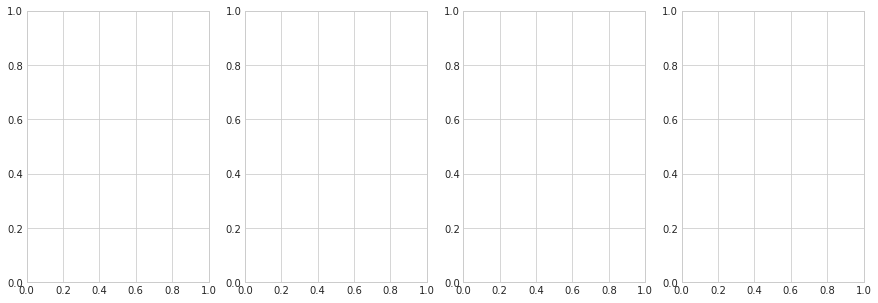

In [164]:
plot_result(cv_val, cv_predict, cv_scores)

## Submission File

In [167]:
for i, a in enumerate(test_predicts[:-1]):
    if i ==0:
        test = a
    else:
        test += a

In [168]:
test.shape

(2716,)

In [175]:
submission_무형 = submission[submission.상품군 == '무형']
submission_test = submission.drop(submission_무형.index)

In [176]:
submission_test['취급액'] = test
submission_test.취급액 = submission_test.취급액/3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
submission = pd.concat([submission_test, submission_무형]).sort_index()

In [183]:
submission = submission.fillna(0)
submission.head()

,마더코드,상품코드,상품명,상품군,판매단가,취급액
방송일시,,,,,,
2020-06-01 06:20:00,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,6.853178e+06
2020-06-01 06:40:00,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,5.464822e+06
2020-06-01 07:00:00,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,6.173502e+06
2020-06-01 07:20:00,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,1.401148e+07
2020-06-01 07:40:00,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,1.094772e+07


In [187]:
submission.to_excel('submission.xlsx')